# Proizvodnja električne energije iz VE

Prilikom procjene godišnje proizvodnje električne energije iz vjetroelektrana uzeti su u obzir satni podaci o brzini vjetra na 50 m visine na području Tomislavgrada za 2019. godinu. Dodatno su uzeti i podaci za Mostar, s obzirom na puštanje u rad VE Podveležje u 2021. godini, ali trenutno nisu korišteni jer još uvijek za tu VE nije izdata godišnja proizvodnja. Izvor podataka je https://power.larc.nasa.gov/data-access-viewer/ koji osim brzine vjetra na 50 m visine bilježe i brzinu vjetra na 10 m visine.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [14]:
def open_the_file(name):
    file_x=pd.read_excel(name,header=0)
    return file_x

In [15]:
#otvaranje podataka
file1_mostar=open_the_file("POWER_Point_Hourly_20190101_20191231_043d3149N_017d9063E_LST-PODV.xlsx")
file2_tom=open_the_file("POWER_Point_Hourly_20190101_20191231_043d7223N_017d2731E_LST-TOMISLAVGRAD.xlsx")


In [16]:
file2_tom.head(2)

,YEAR,MO,DY,HR,T2M,WS10M,WD10M,WS50M
0,2019,1,1,0,-1.92,6.46,31.65,9.72
1,2019,1,1,1,-2.13,6.19,31.91,9.52


Lopatice vjetroturbina na obje lokacije su postavljene na nešto većim visinama, ali će se za dalji proračun uzeti brzina vjetra na visini od 50 m. Maksimalna brzina vjetra u Tomislavgradu dostiže oko 20 m/s na toj visini, a u Podveležju oko 17.6 m/s. Postoje određene sumnje u tačnost izvora podataka s obzirom na zabilježene podatke o minimumu temperatura na obje lokacije, s tim da ipak postoji mogućnost da zaista ovakvi minimumi jesu zabilježeni jer se radi o djelimično planinskim područjima. Standardne devijacije brzine vjetra u oba kraja su značajne i ukazuju na njegovu promjenjivost.  Osim podataka o brzini vjetra i temperaturi, dat je i podatak o pravcu vjetra na 10 m visine. (WD10M). Srednje vrijednosti brzina vjetra su pomjerene udesno ekstremnim vrijednostima maksimuma. 


In [17]:
file1_mostar.describe()

,YEAR,MO,DY,HR,T2M,WS10M,WD10M,WS50M
count,8760.0,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2019.0,6.526027,15.720548,11.500000,9.470803,2.968703,124.162781,4.208791
std,0.0,3.448048,8.796749,6.922582,8.831654,2.035766,86.814132,2.645784
min,2019.0,1.000000,1.000000,0.000000,-14.780000,0.020000,0.310000,0.040000
25%,2019.0,4.000000,8.000000,5.750000,3.030000,1.610000,45.520000,2.340000
50%,2019.0,7.000000,16.000000,11.500000,9.250000,2.370000,100.990000,3.630000
75%,2019.0,10.000000,23.000000,17.250000,15.820000,3.760000,192.672500,5.440000
max,2019.0,12.000000,31.000000,23.000000,31.940000,14.540000,359.860000,17.550000


In [18]:
file2_tom.describe()

,YEAR,MO,DY,HR,T2M,WS10M,WD10M,WS50M
count,8760.0,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2019.0,6.526027,15.720548,11.500000,10.921790,3.457708,116.732648,4.658413
std,0.0,3.448048,8.796749,6.922582,9.281895,2.401730,85.586181,2.962694
min,2019.0,1.000000,1.000000,0.000000,-12.130000,0.060000,0.000000,0.060000
25%,2019.0,4.000000,8.000000,5.750000,4.212500,1.850000,42.417500,2.557500
50%,2019.0,7.000000,16.000000,11.500000,10.360000,2.710000,91.355000,3.880000
75%,2019.0,10.000000,23.000000,17.250000,17.362500,4.370000,180.210000,6.090000
max,2019.0,12.000000,31.000000,23.000000,36.940000,17.600000,359.840000,20.640000


Text(0.5, 1.0, 'Tomislavgrad')

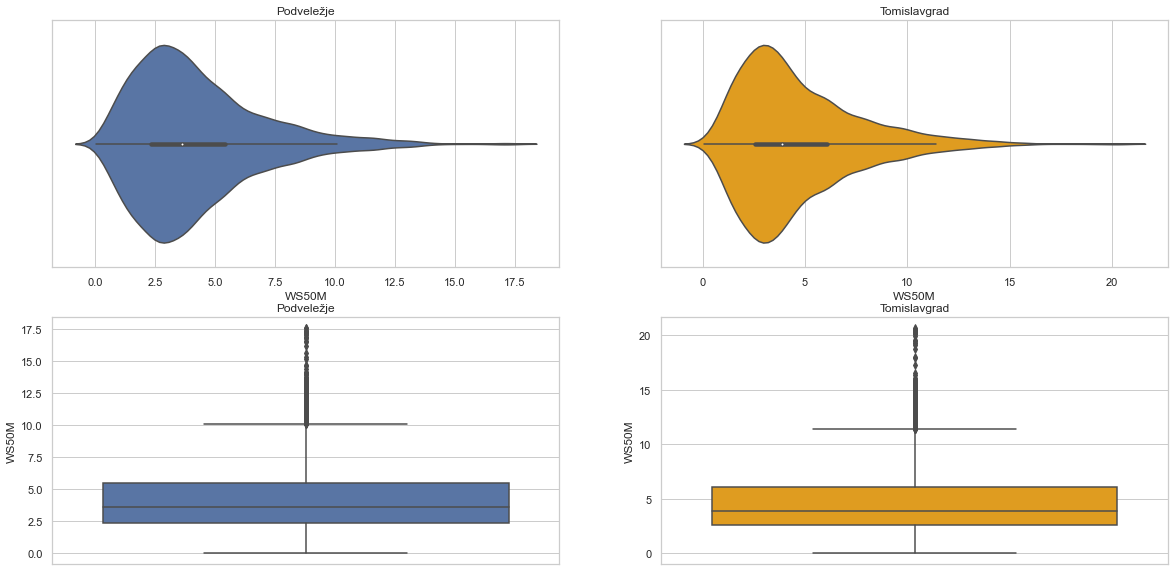

In [19]:

sns.set_theme(style="whitegrid")
fig, ax=plt.subplots(nrows=2,ncols=2, figsize=(20,10))

sns.violinplot(x=file1_mostar["WS50M"],ax=ax[0,0])
ax[0,0].set_title("Podveležje")

ax[0,1] = sns.violinplot(x=file2_tom["WS50M"],ax=ax[0,1],color="orange")
ax[0,1].set_title("Tomislavgrad")


sns.boxplot(y=file1_mostar["WS50M"],ax=ax[1,0])
ax[1,0].set_title("Podveležje")

ax[1,0] = sns.boxplot(y=file2_tom["WS50M"],ax=ax[1,1],color="orange")
ax[1,0].set_title("Tomislavgrad")

(0.0, 9196.95)

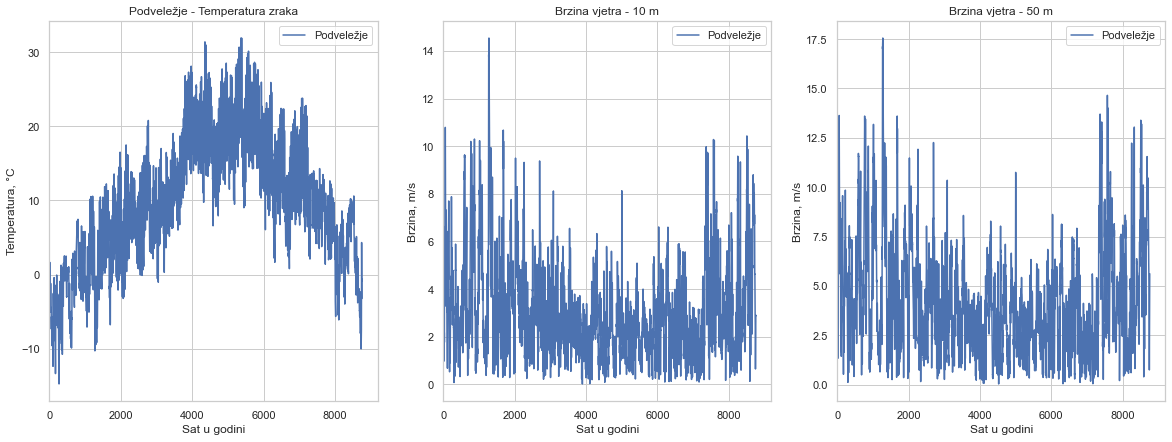

In [20]:
fig, ax=plt.subplots(ncols=3, figsize=(20,7))
file_names=[file1_mostar]
cities=["Podveležje"]


[i['T2M'].plot(ax=ax[0],label=cities[k]) for k,i in enumerate(file_names) ]
ax[0].set_title("Podveležje - Temperatura zraka")
ax[0].set_xlabel("Sat u godini")
ax[0].set_ylabel("Temperatura, °C")
ax[0].legend()
ax[0].set_xlim(0)

[i["WS10M"].plot(ax=ax[1],label=cities[k]) for k,i in enumerate(file_names) ]
ax[1].set_title("Brzina vjetra - 10 m")
ax[1].set_xlabel("Sat u godini")
ax[1].set_ylabel("Brzina, m/s")
ax[1].legend()
ax[1].set_xlim(0)

[i["WS50M"].plot(ax=ax[2],label=cities[k]) for k,i in enumerate(file_names) ]
ax[2].set_title("Brzina vjetra - 50 m")
ax[2].set_xlabel("Sat u godini")
ax[2].set_ylabel("Brzina, m/s")
ax[2].legend()
ax[2].set_xlim(0)



(0.0, 9196.95)

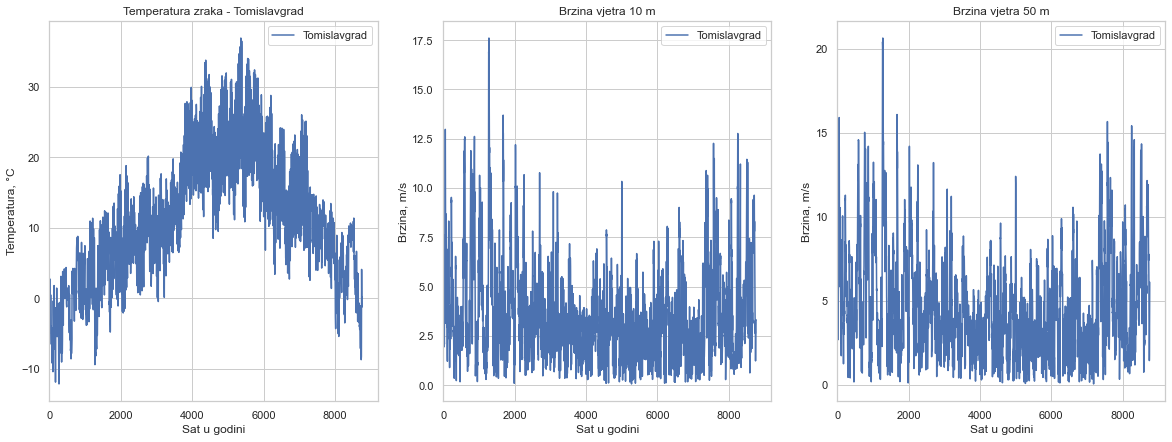

In [21]:
fig, ax=plt.subplots(ncols=3, figsize=(20,7))
file_names=[file2_tom]
cities=["Tomislavgrad"]


[i['T2M'].plot(ax=ax[0],label=cities[k]) for k,i in enumerate(file_names) ]
ax[0].set_title("Temperatura zraka - Tomislavgrad")
ax[0].set_xlabel("Sat u godini")
ax[0].set_ylabel("Temperatura, °C")
ax[0].legend()
ax[0].set_xlim(0)

[i["WS10M"].plot(ax=ax[1],label=cities[k]) for k,i in enumerate(file_names) ]
ax[1].set_title("Brzina vjetra 10 m")
ax[1].set_xlabel("Sat u godini")
ax[1].set_ylabel("Brzina, m/s")
ax[1].legend()
ax[1].set_xlim(0)

[i["WS50M"].plot(ax=ax[2],label=cities[k]) for k,i in enumerate(file_names) ]
ax[2].set_title("Brzina vjetra 50 m")
ax[2].set_xlabel("Sat u godini")
ax[2].set_ylabel("Brzina, m/s")
ax[2].legend()
ax[2].set_xlim(0)


Na internetu su pronađeni podaci za krivu proizvodnje za vjetroturbine tip Siemens SWT-2.3-108 snage 2,3 MW. Na lokaciji VE Mesihovina instalisana su 22 ovakva vjetroagregata. Za lokaciju VE Jelovača nije pronađen tačan tip vjetroturbina, osim što je poznat podatak da je instalisana snaga po vjetroagregatu 2 MW. Za krivu proizvodnje je uzet tip Siemens Gamesa G114-2.0 MW. Na ovoj lokaciji je instalirano 18 vjetroagregata.

In [22]:
#Mesihovina
x=np.arange(3,20.5,0.5)
y=27,58,92,157,225,374,524,722,919,1155,1389,1670,1947,2163,2243,2273,2300,2300,2300,2300,2300,2300,2300,2300,2300,2300,2300,2300,2300,2300,2300,2300,2300,2300,2300
#Jelovača
x2=np.arange(3,26,1)
y2=32,146,342,621,1008,1486,1836,1965,1994,1999,2000,2000,2000,2000,2000,2000,2000,2000,2000,1906,1681,1455,1230

Text(0.5, 1.0, 'Siemens Gamesa G114-2.0 MW')

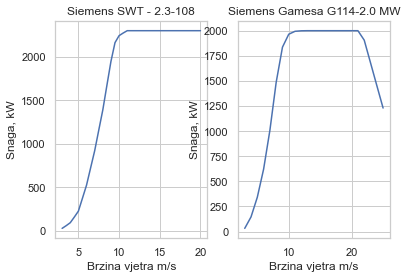

In [24]:
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(x,y)
ax1.set_xlabel("Brzina vjetra m/s")
ax1.set_ylabel("Snaga, kW")
ax1.set_title ("Siemens SWT - 2.3-108")


ax2.plot(x2,y2)
ax2.set_xlabel("Brzina vjetra m/s")
ax2.set_ylabel("Snaga, kW")
ax2.set_title ("Siemens Gamesa G114-2.0 MW")

Za Siemens SWT - 2.3-108 podaci o snazi na krivoj su dati za korak brzine vjetra od 0.5 m/s a za Siemens Gamesa G114-2.0 MW u koraku od 1.0 m/s. Kako bi se ovi podaci povezali sa brzinama vjetra iz meteorološke baze, izvršit će se linearna interpolacije kako bi se dobila snaga vjetroagregata pri brzinama npr. 3.1 m/s, 3.2 m/s i sl.

In [25]:
def lin_interpolate_power(array1,array2,array3):
    inter=np.interp(array1,array2,array3)
    return inter

In [26]:
#Mesihovina
x_wind=np.arange(3.0,20.0,0.1)
y_power=lin_interpolate_power(x_wind, x, y)

#Jelovača

x_wind2=np.arange(3.0,25.0,0.1)
y_power2=lin_interpolate_power(x_wind2, x2, y2)

Text(0.5, 0, 'Brzina vjetra, m/s')

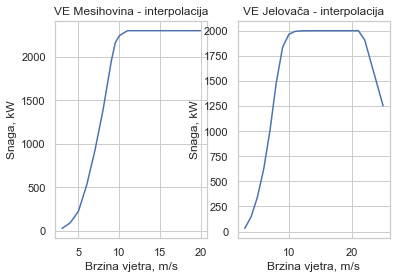

In [27]:
f, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(x_wind,y_power)
ax1.set_title("VE Mesihovina - interpolacija")
ax1.set_ylabel("Snaga, kW")
ax1.set_xlabel("Brzina vjetra, m/s")

ax2.plot(x_wind2,y_power2)
ax2.set_title("VE Jelovača - interpolacija")
ax2.set_ylabel("Snaga, kW")
ax2.set_xlabel("Brzina vjetra, m/s")

Sada će se izračunati snaga za vjetroagregate pri brzinama vjetra koje su zabilježene u meterološkim podacima na visini od 50 m/s.

In [30]:
#zaokruživanje na jednu decimalu
wind_tom=round(file2_tom[["WS10M","WS50M"]],1)

In [31]:
wind_tom=wind_tom.assign(P50M_Mesih=0)
wind_tom=wind_tom.assign(P50M_Jel=0)

In [32]:
def float_and_round (array1):
    array1=np.float64(np.asarray(array1))
    array1=np.round(array1,1)
    return array1

In [33]:
x_wind=float_and_round(x_wind)
x_wind2=float_and_round(x_wind2)

for value,value2 in zip(x_wind,y_power):
    wind_tom.loc[wind_tom["WS50M"]==value,"P50M_Mesih"]=value2
    
for value,value2 in zip(x_wind2,y_power2):
    wind_tom.loc[wind_tom["WS50M"]==value,"P50M_Jel"]=value2

In [34]:
wind_tom.head(3)

,WS10M,WS50M,P50M_Mesih,P50M_Jel
0,6.5,9.7,2195.0,1926.3
1,6.2,9.5,2163.0,1900.5
2,6.1,9.5,2163.0,1900.5


Text(0, 0.5, 'Snaga po agregatu, kW')

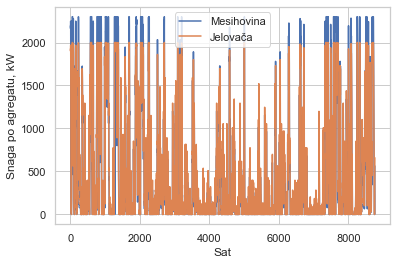

In [35]:
wind_tom["P50M_Mesih"].plot(label="Mesihovina")
wind_tom["P50M_Jel"].plot(label="Jelovača")
plt.legend()
plt.xlabel("Sat")
plt.ylabel("Snaga po agregatu, kW")

In [36]:
ann_production_mes=wind_tom["P50M_Mesih"].sum()
ann_production_jel=wind_tom["P50M_Jel"].sum()

print("Godišnja proizvodnja po agregatu, Mesihovina:", ann_production_mes, "kWh")
print("Godišnja proizvodnja po agregatu, Jelovača: ", ann_production_jel, "kWh")
print("Broj agregata, Mesihovina:", 22)
print("Broj agregata, Jelovača: ", 18)
total_mes=(ann_production_mes*22)/1000000
total_jel=(ann_production_jel*18)/1000000
total_ve=total_mes+total_jel
print("Ukupna godišnja proizvodnja, Mesihovina:", total_mes, "GWh")
print("Ukupna godišnja proizvodnja, Jelovača: ", total_jel, "GWh")
print("Ukupna godišnja proizvodnja, VE: ", total_ve, "GWh")

Godišnja proizvodnja po agregatu, Mesihovina: 3954064.200000004 kWh
Godišnja proizvodnja po agregatu, Jelovača:  4074701.6000000034 kWh
Broj agregata, Mesihovina: 22
Broj agregata, Jelovača:  18
Ukupna godišnja proizvodnja, Mesihovina: 86.98941240000008 GWh
Ukupna godišnja proizvodnja, Jelovača:  73.34462880000005 GWh
Ukupna godišnja proizvodnja, VE:  160.33404120000012 GWh


(0.0, 0.09093)

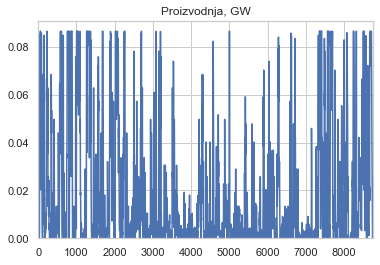

In [37]:
wind_tom["P50M_Total, GWh"]=(wind_tom["P50M_Mesih"]*22+wind_tom["P50M_Jel"]*18)/1000000
wind_tom["P50M_Total, GWh"].plot(title="Proizvodnja, GW")
plt.xlim(0,8760)
plt.ylim(0)

In [38]:
wind_tom[["Year","Month","Day"]]=file2_tom[['YEAR', 'MO', 'DY']].copy()

(1.0, 12.0)

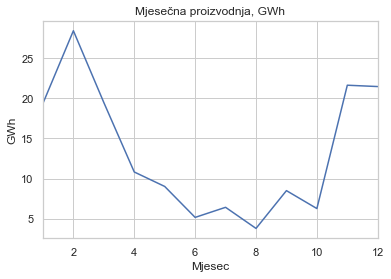

In [39]:
wind_tom.groupby("Month")["P50M_Total, GWh"].sum().plot(title="Mjesečna proizvodnja, GWh")
plt.xlabel("Mjesec")
plt.ylabel("GWh")
plt.xlim(1,12)

# Reference:

<br>https://power.larc.nasa.gov/data-access-viewer/
<br>https://www.thewindpower.net/turbine_en_403_siemens_swt-2.3-108.php
<br>https://en.wind-turbine-models.com/turbines/428-gamesa-g114-2.0mw#datasheet
